In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline
from discover_feature_relationships import discover
import plotly.graph_objs as go
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls

In [63]:
#to import data
data=pd.read_csv("databank.csv",na_values=['unknown'])

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


From above we can see that the mean age group is of 40 years with s.d. 10.42 and with the median of 38 years.


In [6]:
print(data.info())

print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
#to separete the categorical data types and numerical data types
cato_var=data.dtypes.index[np.where(data.dtypes=="object")].values.tolist()
num_var=data.dtypes.index[np.where(data.dtypes!="object")].values.tolist()

# To check freq distrbution for categorical variables


In [8]:
for feq in cato_var:
    print("==**%s**==" % feq)
    print(pd.DataFrame({"freq":data[feq].value_counts(),
                        "freq_perc": 100*data[feq].value_counts()/sum(data[feq].value_counts())}))

==**job**==
                freq  freq_perc
admin.         10422  25.507856
blue-collar     9254  22.649175
technician      6743  16.503500
services        3969   9.714132
management      2924   7.156493
retired         1720   4.209702
entrepreneur    1456   3.563562
self-employed   1421   3.477899
housemaid       1060   2.594351
unemployed      1014   2.481766
student          875   2.141563
==**marital**==
           freq  freq_perc
married   24928  60.640265
single    11568  28.140508
divorced   4612  11.219227
==**education**==
                      freq  freq_perc
university.degree    12168  30.838634
high.school           9515  24.114859
basic.9y              6045  15.320475
professional.course   5243  13.287883
basic.4y              4176  10.583673
basic.6y              2292   5.808855
illiterate              18   0.045619
==**default**==
      freq  freq_perc
no   32588  99.990795
yes      3   0.009205
==**housing**==
      freq  freq_perc
yes  21576  53.674312
no   18622  46.3

In [9]:
#making data more feasible to work
data['education']=data['education'].replace("basic.4y","basic").replace("basic.6y","basic").replace("basic.9y","basic")

In [10]:
data['education'].unique()

array(['basic', 'high.school', 'professional.course', nan,
       'university.degree', 'illiterate'], dtype=object)

# Profile Report

In [11]:
pp.ProfileReport(data, correlation_threshold=1.0,bins=15)

Number of variables,21
Number of observations,41188
Total Missing (%),1.5%
Total size in memory,6.6 MiB
Average record size in memory,168.0 B
Numeric,10
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [12]:
#For discovring relationships between the features.
classif = ['pday']
df_results = discover.discover(data, classif)

In [13]:
df_results[df_results['score']>0.35]


,feature,score,target
61,job,0.355090,education
253,poutcome,0.954252,pdays
273,poutcome,0.865798,previous
293,previous,0.590942,poutcome
294,emp.var.rate,0.375504,poutcome
297,euribor3m,0.375301,poutcome


From above dataframe we can see that education is well predicted by job.
also pdays is fairly predicted by poutcome
and previous also can be well predicted by poutcome.

In [14]:
#Pivot table for discovered relationships.
cm = sns.light_palette("red", as_cmap=True)

df_to_draw = df_results.pivot(index='target', columns='feature', values='score').fillna(1).clip(lower=0) \
.style.background_gradient(cmap=cm, axis=1) \
.set_precision(2)
df_to_draw

feature,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default,duration,education,emp.var.rate,euribor3m,housing,job,loan,marital,month,nr.employed,pdays,poutcome,previous,y
target,,,,,,,,,,,,,,,,,,,,,
age,1,0,0,0,0,0,0,0,0.018,0,0,0,0.17,0,0.15,0,0,0,0,0,0
campaign,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cons.conf.idx,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cons.price.idx,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
contact,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
day_of_week,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
default,0,0,0,0.33,0,0,1,0,0,0.33,0.33,0,0,0,0,0.33,0.33,0,0,0,0
duration,0,0.0028,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,1,0,0,0,0.36,0,0,0,0,0,0,0,0


# Visualization

In [15]:
sns.set(style='dark')
sns.set(style='whitegrid',color_codes=True)

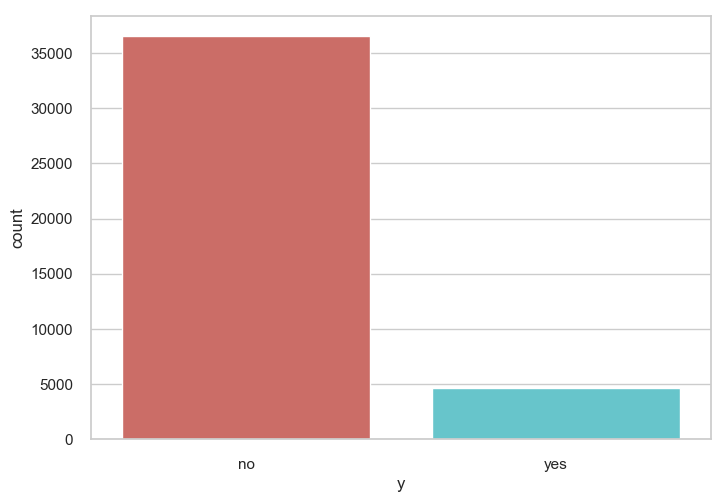

In [16]:
sns.countplot(data=data,palette='hls',x='y')

In [17]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


# From above:-
    1.Average age of customer who bought term deposit is higher than that of customers who didn't.
    2.The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
    3.Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

# insights from numbers across 2 classes

In [18]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


From the above operation we can conclude the average ages of the professions or jobs as well as the (Euro Interbank Offered Rate) i.e euribor3m is pretty low for the students we can say that student are getting loan by less amount of interest.

In [19]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265


1.From the above operation we can see that the p-days for the single is high than other.
2.The emp.var.rate is also negative for single 
we can conclude that bank has their diff policy for the customers who are single.

In [20]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298


Above Figure tells us that the No and yes for the customer who has a admin as a profession is higher than that of other ones.Least No is by the students(may be it is beacause of less number of students are their customers) 

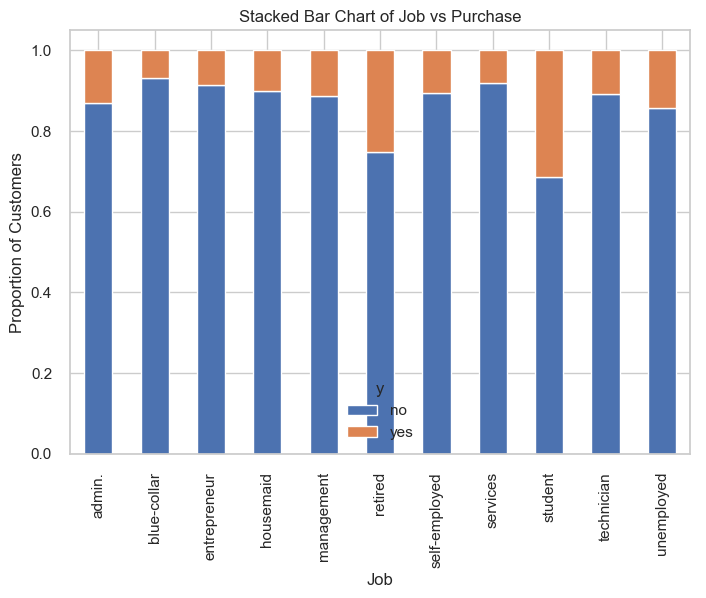

In [21]:
table=pd.crosstab(data.job, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job vs Purchase')
plt.xlabel('Job')
plt.ylabel('Proportion of Customers')
plt.savefig('Job_vs_pur_stack')

# Marital vs Y

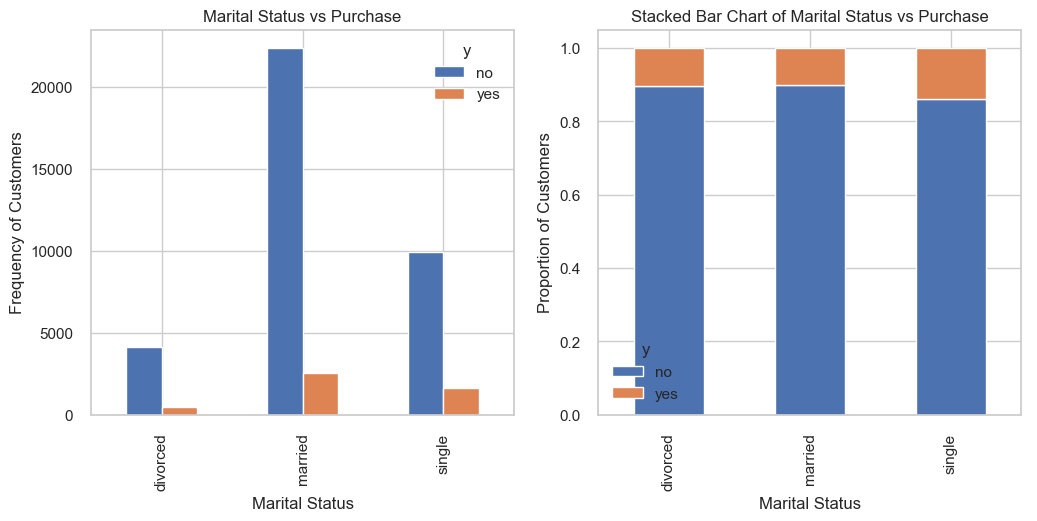

In [22]:
fig = plt.figure(figsize = (12,5))

ax = fig.add_subplot(1,2,1)
table=pd.crosstab(data.marital, data.y).plot(kind='bar', ax = ax)
plt.title('Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Customers')

ax = fig.add_subplot(1,2,2)
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax = ax)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')


fig.savefig('mariral_vs_pur_stack')

# Education vs Y

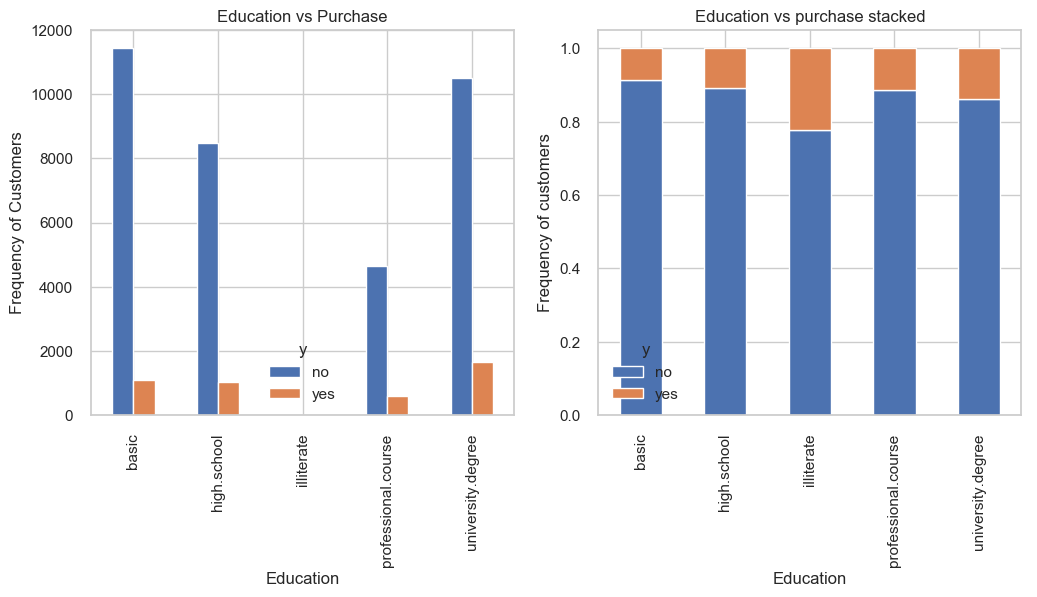

In [23]:
fig = plt.figure(figsize = (12,5))

ax = fig.add_subplot(1,2,1)
table=pd.crosstab(data.education, data.y).plot(kind='bar', ax = ax)
plt.title('Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Frequency of Customers')

ax=fig.add_subplot(1,2,2)
table=pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',ax=ax)
plt.title('Education vs purchase stacked')
plt.xlabel('Education')
plt.ylabel('Frequency of customers')
fig.savefig("Education vs purchase stacked")

From the above plot we can see that illiterate people bought more product than the other ones.
i.e. bank has to do somethingh for others to and also focus on their illiterate customers for future profit.

# Day of week vs Y

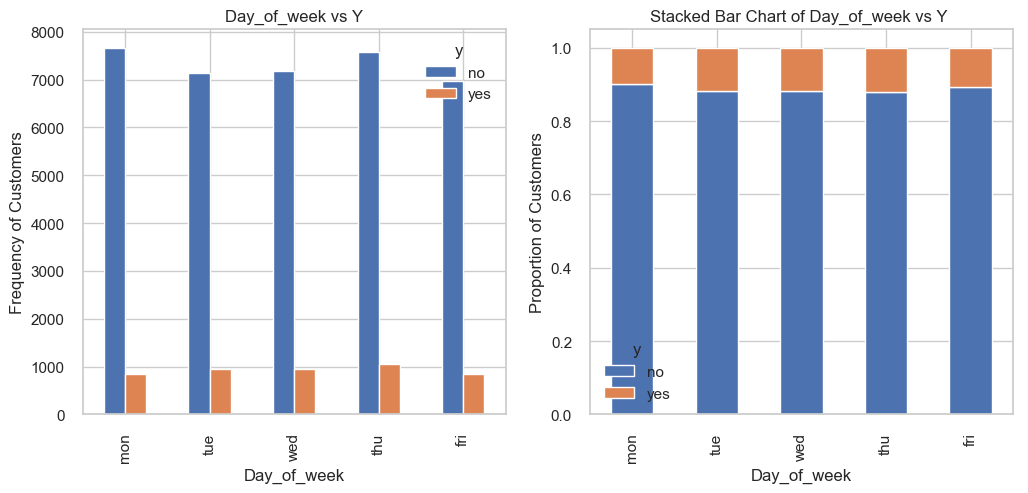

In [24]:
order=['mon','tue','wed','thu','fri']

fig=plt.figure(figsize=(12,5))

ax=fig.add_subplot(1,2,1)
table=pd.crosstab(data.day_of_week,data.y).loc[order].plot(kind='bar',ax=ax)
plt.title("Day_of_week vs Y")
plt.xlabel("Day_of_week")
plt.ylabel("Frequency of Customers")

ax=fig.add_subplot(1,2,2)
table=pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(1).astype(float), axis=0).loc[order].plot(kind='bar', stacked=True, ax = ax)
plt.title('Stacked Bar Chart of Day_of_week vs Y ')
plt.xlabel('Day_of_week')
plt.ylabel('Proportion of Customers')

fig.savefig("Day of week vs y")

There is considerably no special effect of days on the sale .

# Month Vs. Y

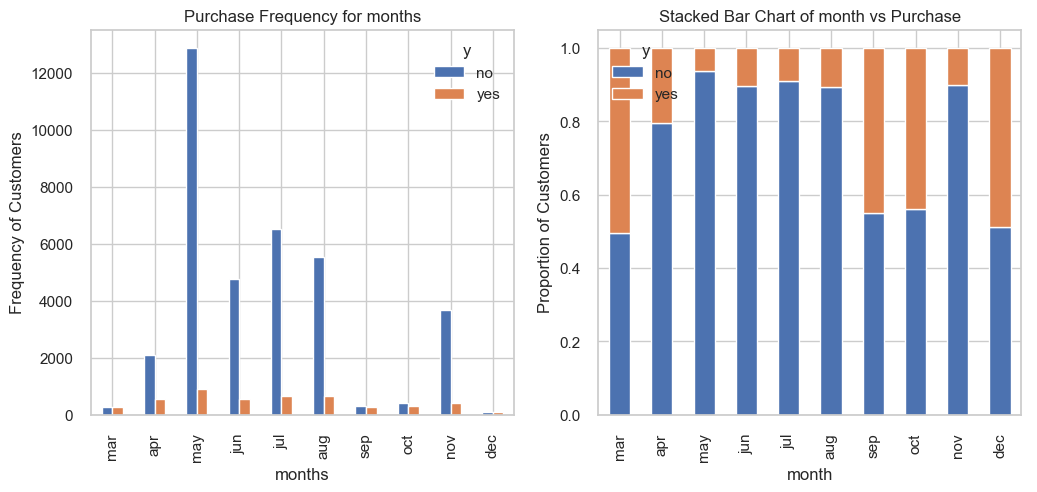

In [25]:
order = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

fig = plt.figure(figsize = (12,5))

ax = fig.add_subplot(1,2,1)
table=pd.crosstab(data.month, data.y).loc[order].plot(kind='bar', ax = ax)
plt.title('Purchase Frequency for months')
plt.xlabel('months')
plt.ylabel('Frequency of Customers')

ax = fig.add_subplot(1,2,2)
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).loc[order].plot(kind='bar', stacked=True, ax = ax)
plt.title('Stacked Bar Chart of month vs Purchase')
plt.xlabel('month')
plt.ylabel('Proportion of Customers')

fig.savefig('pur_fre_month_bar')

mar,sep,oct and dec have high rate of sale than other months .

# poutcome Vs. Y

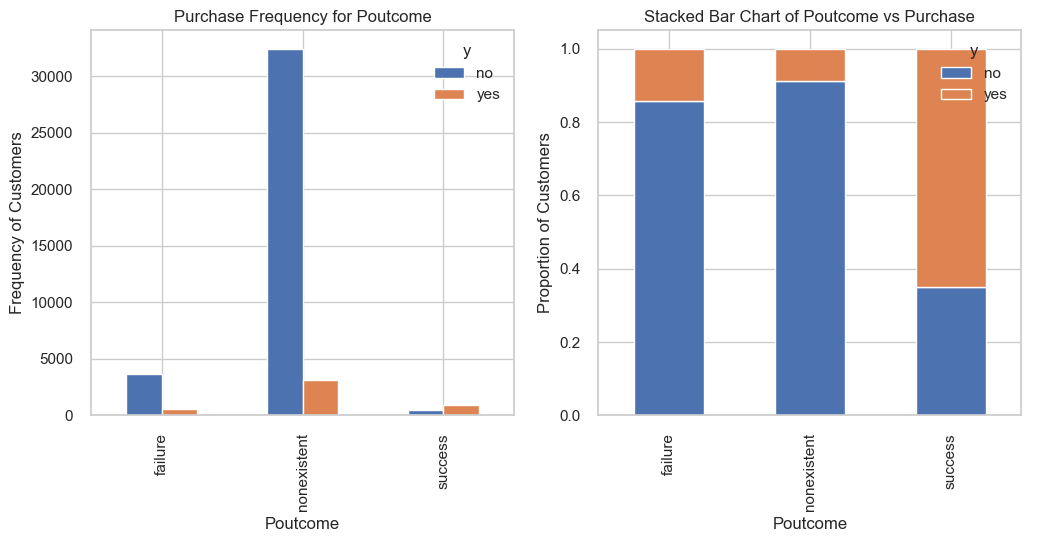

In [26]:
fig = plt.figure(figsize = (12,5))

ax = fig.add_subplot(1,2,1)
table=pd.crosstab(data.poutcome, data.y).plot(kind='bar', ax = ax)
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Customers')

ax = fig.add_subplot(1,2,2)
table=pd.crosstab(data.poutcome, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax = ax)
plt.title('Stacked Bar Chart of Poutcome vs Purchase')
plt.xlabel('Poutcome')
plt.ylabel('Proportion of Customers')

fig.savefig('pur_fre_pout_bar')

From above plot we can conclude that Previous campaign had got success.

# Histogram

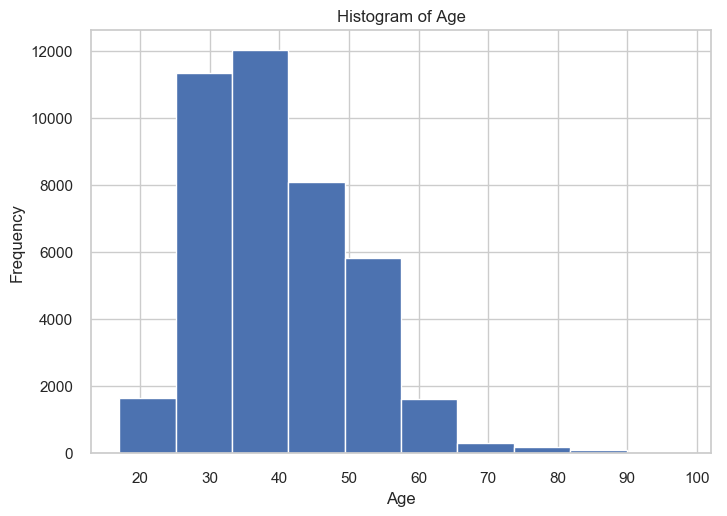

In [27]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

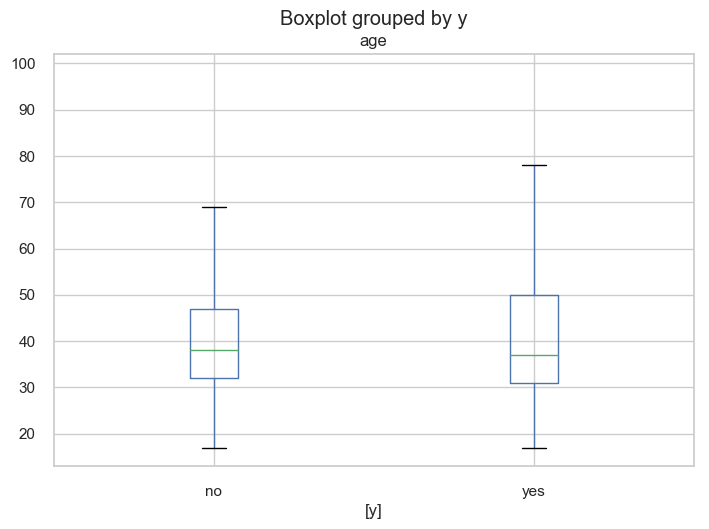

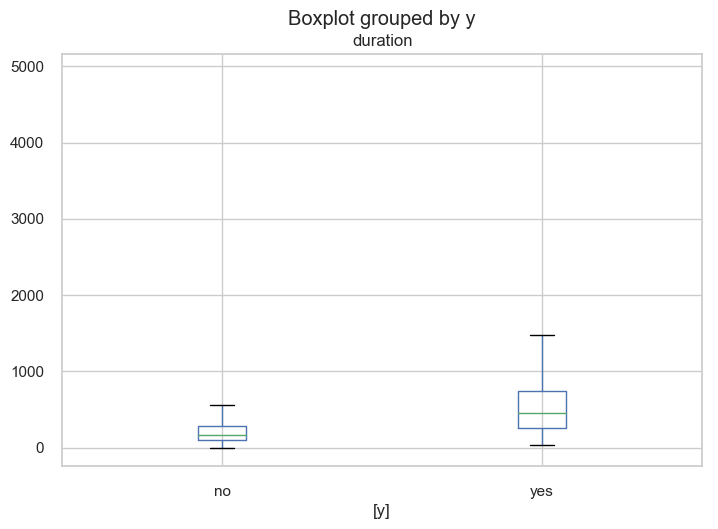

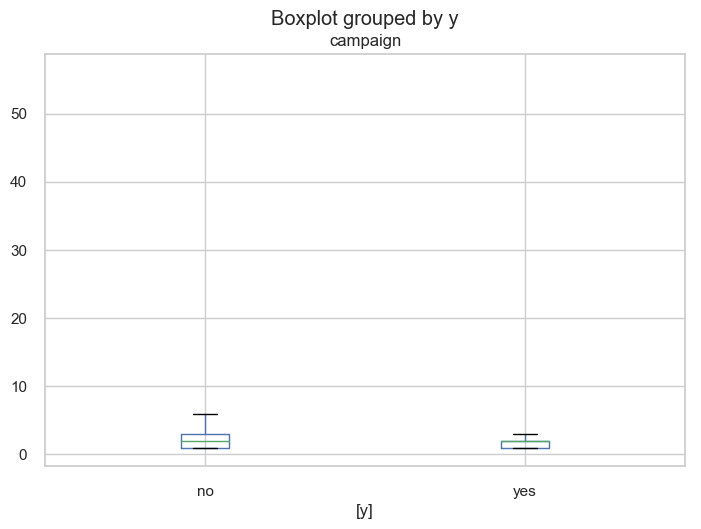

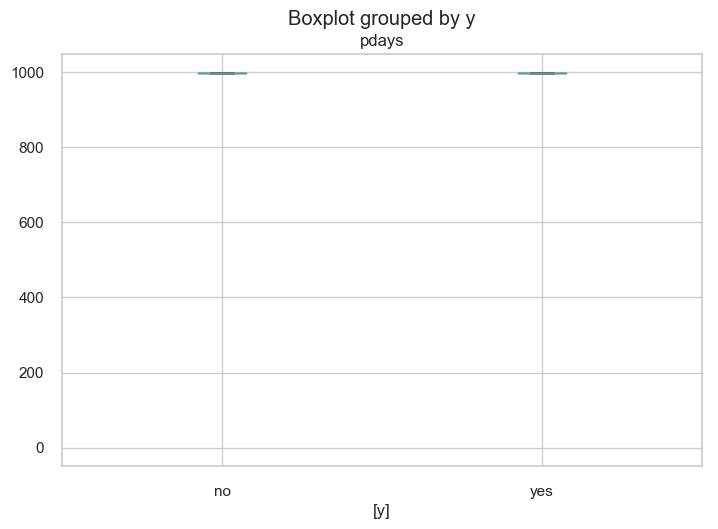

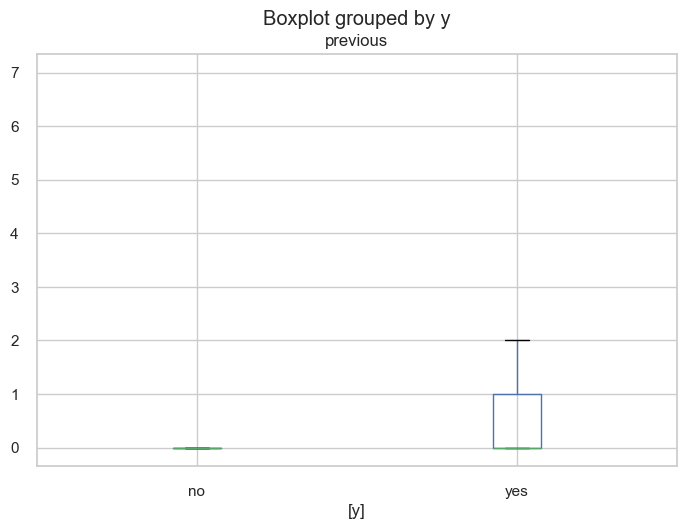

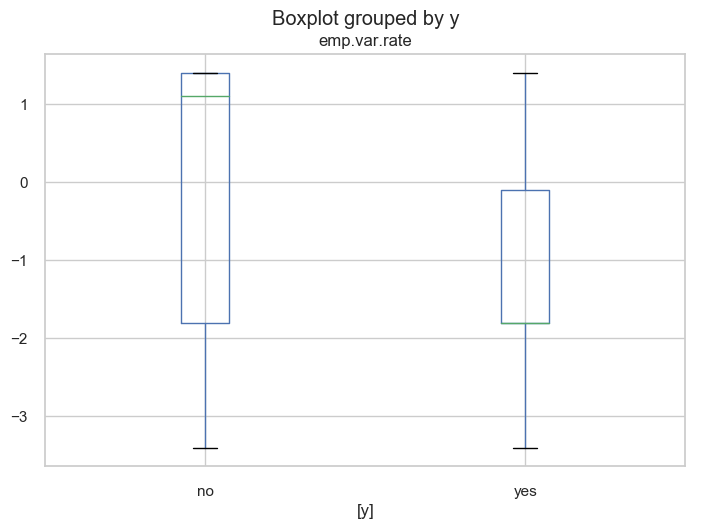

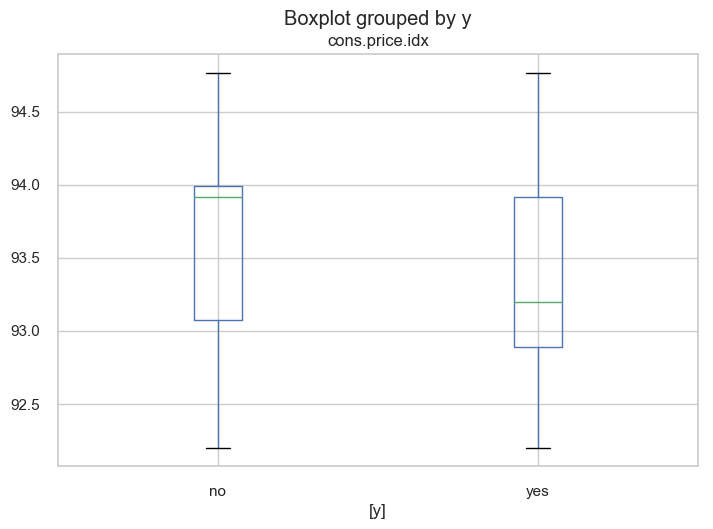

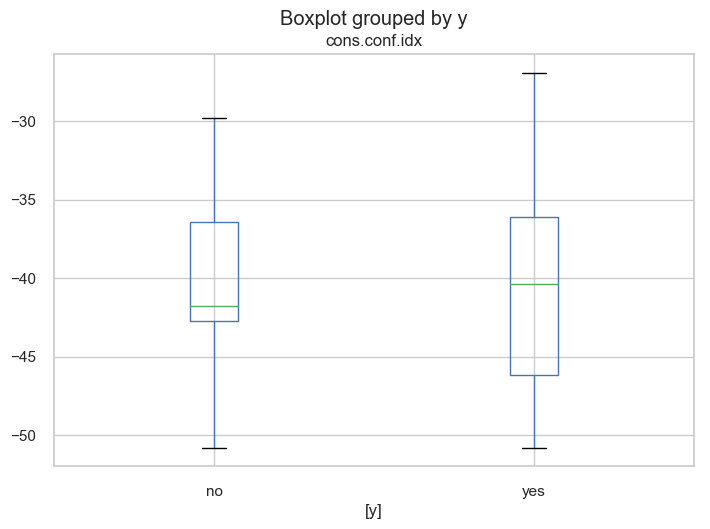

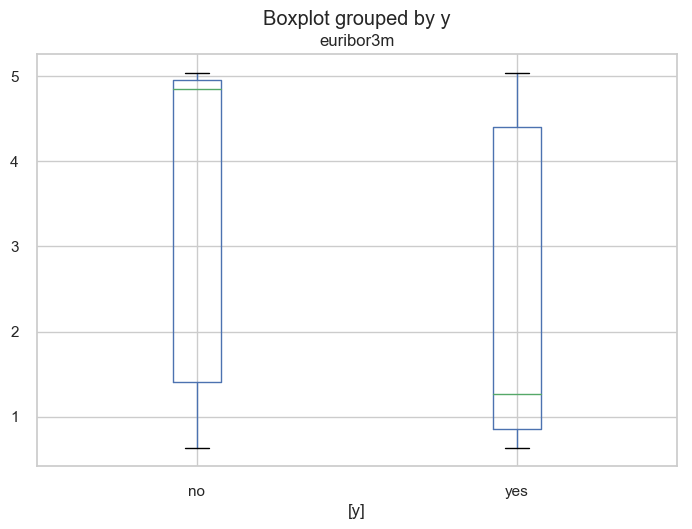

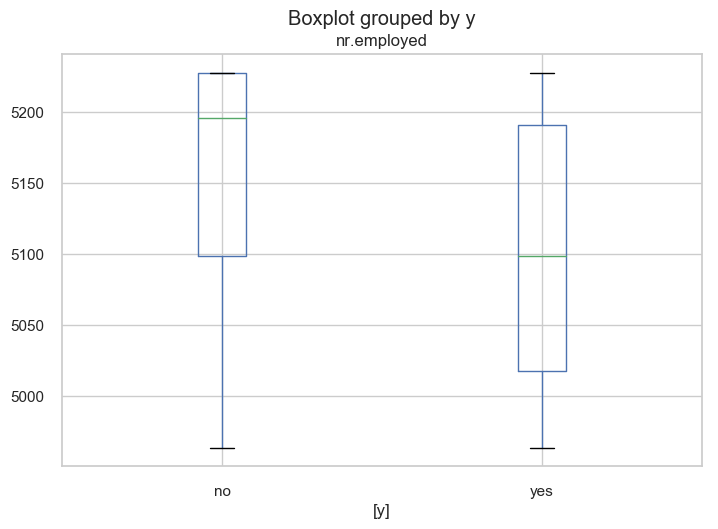

In [64]:
for x in num_var:
    data[[x, "y"]].boxplot(by="y")

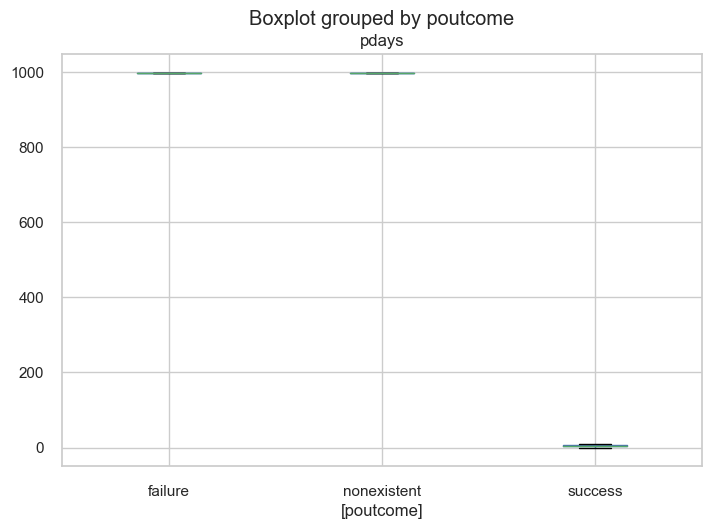

In [65]:
data[["pdays", "poutcome"]].boxplot(by="poutcome")


# Correlation between numerical variables

In [31]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


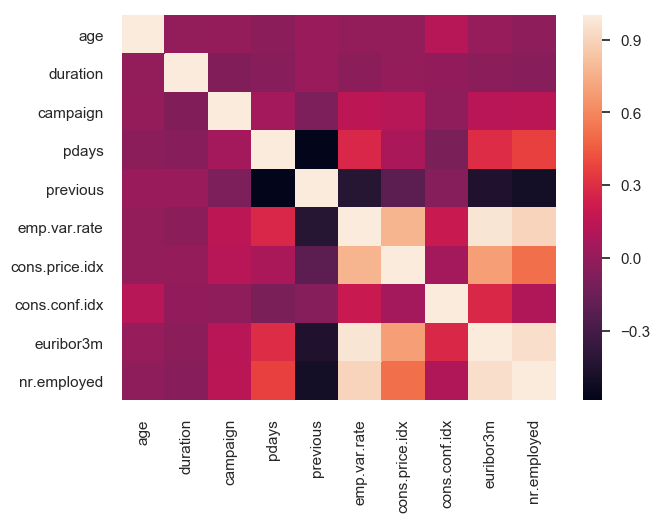

In [32]:
plt.subplots(figsize=(7, 5))
sns.heatmap(data.corr())

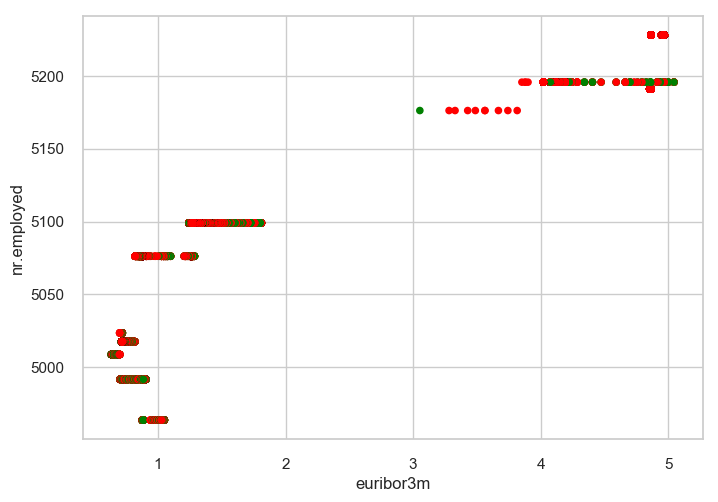

In [33]:
colors = np.where(data["y"]=="yes", "green", "red")
data.plot.scatter("euribor3m", "nr.employed", c=colors)

From the above scatter plot we see that both the varibales are highly positively correlated.

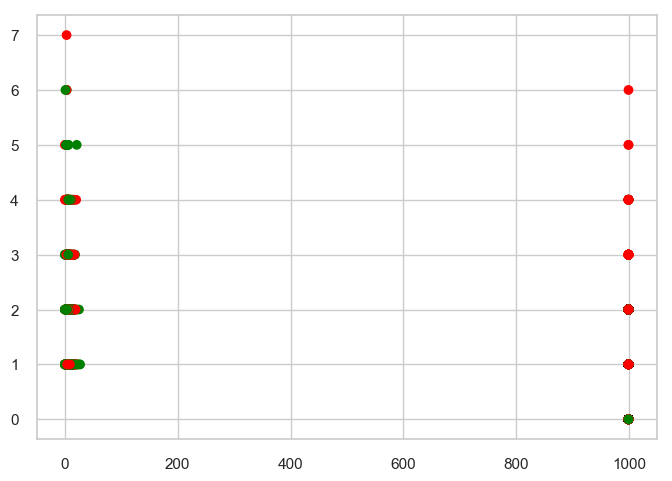

In [34]:
colors = np.where(data["y"]=="yes", "green", "red")
plt.scatter(data["pdays"], data["previous"], c=colors)

# Data Cleaning and filling out missing values¶


In [35]:
data["pdays"] = np.where(data["pdays"] == 999, 0, data["pdays"])

From profiling report we can see that the variables job, marital, education, default, housing and loan have missing values.

In [36]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

In [37]:
data["job"] = data["job"].fillna("admin.")
data["marital"] = data["marital"].fillna("married")
data["education"] = data["education"].fillna("university.degree")
data["default"] = data["default"].fillna("no")
data["housing"] = data["housing"].fillna("yes")
data["loan"] = data["loan"].fillna("no")

In [38]:
data.marital.value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

# Spliting the Data

In [39]:
#To split the data into train and test for further analysis of the data.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

print("proportion of traning set:\n",train_set['y'].value_counts()) #yes,no proportion in the train set

print("proportion of testing set:\n",test_set['y'].value_counts()) #In test set

proportion of traning set:
 no     29245
yes     3705
Name: y, dtype: int64
proportion of testing set:
 no     7303
yes     935
Name: y, dtype: int64


In [40]:
cato_var.remove("y")


In [41]:

train_set_one_hot = pd.get_dummies(train_set[cato_var]) #one hot encoding

train_set_one_hot.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
35451,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
30592,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
17914,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3315,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# Feature Scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024285C9BD30>,
      dtype=object)

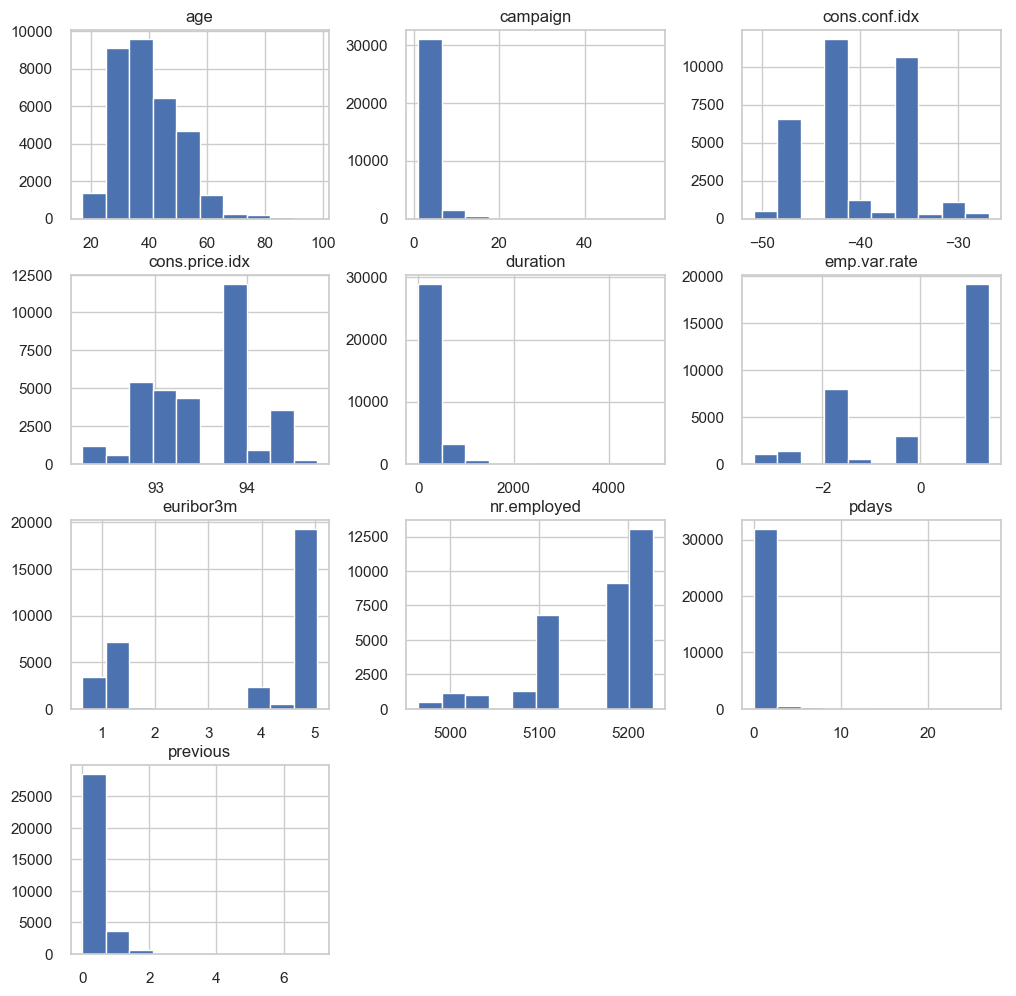

In [42]:
train_set[num_var].hist(figsize = [12, 12])

Here we can see that all the numerical variables are at a different scale. Hence need to do the feature scaling

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [46]:
scaler = StandardScaler()
data1=pd.DataFrame(scaler.fit_transform(train_set[num_var]))

C:\Users\lalit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\lalit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024283C414E0>,
      dtype=object)

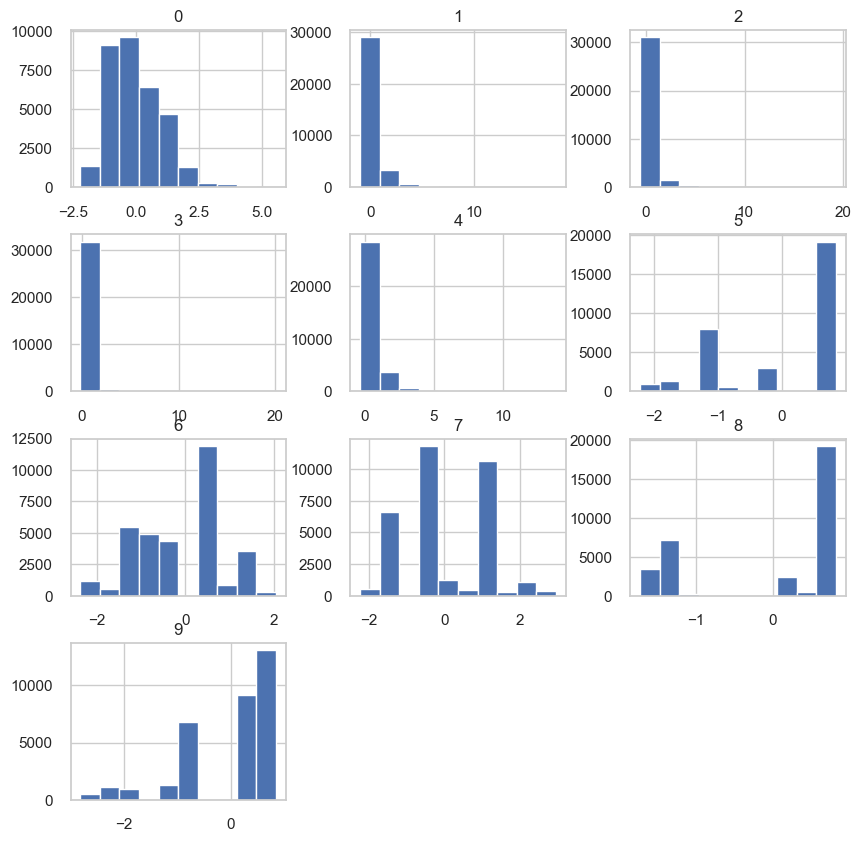

In [93]:
data1.hist(figsize=((10,10))) 

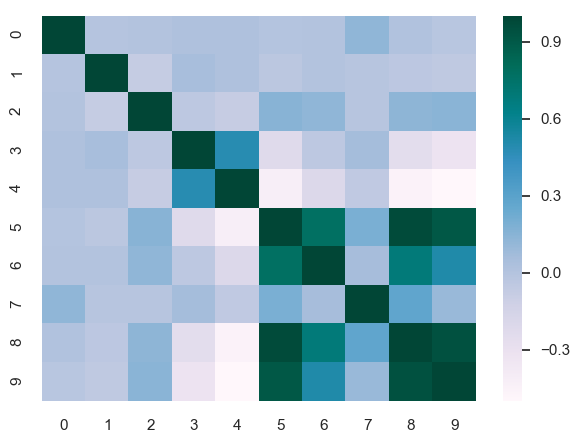

In [91]:
plt.subplots(figsize=(7, 5))
sns.heatmap(data1.corr(),cmap='PuBuGn')

Above figure showing correlation between the numerical scaled variables.